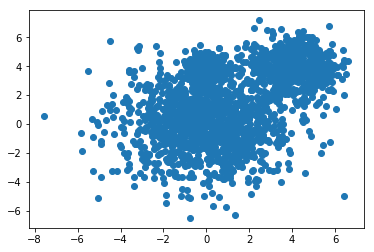

C:\Users\Denis\AppData\Local\conda\conda\envs\tensorflow_env_gpu\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in true_divide


ValueError: operands could not be broadcast together with shapes (4000,4000) (2,2) 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import multivariate_normal

def gmm(X, K, max_iter=20):
    N, D = X.shape
    M = np.zeros((K, D))
    R = np.zeros((N, K))
    C = np.zeros((K, D, D))
    pi = np.ones(K) / K
    
    for k in range(K):
        M[k] = X[np.random.choice(N)]
        C[k] = np.diag(np.ones(D))
        
    costs = np.zeros(max_iter)
    weighted_pdfs = np.zeros((N, K))
    for i in range(max_iter):
        for k in range(K):
            for n in range(N):
                weighted_pdfs[n,k] = pi[k]*multivariate_normal.pdf(X[n], M[k], C[k])
        
        for i in range(K):
            for n in range(N):
                R[n,k] = weighted_pdfs[n,k] / weighted_pdfs[n,:].sum()
        
        for k in range(K):
            Nk = R[:, k].sum()
            pi[k] = Nk / N
            M[k] = R[:,k].dot(X) / Nk
            X_minus_mu = X - M[k]
            C[k] = np.sum(R[n,k]*np.outer(X_minus_mu, X_minus_mu) for n in range(N)) / Nk + np.diag(np.ones(D))*0.001
            
        costs[i] = np.log(weighted_pdfs.sum(axis=1)).sum()
        if i > 0:
            if np.abs(costs[i] - costs[i-1] < 0.1):
                break
                
    plt.plot(costs)
    plt.title("Costs")
    plt.show()

    random_colors = np.random.random((K, 3))
    colors = R.dot(random_colors)
    plt.scatter(X[:,0], X[:,1], c=colors)
    plt.show()

    print("pi:", pi)
    print("means:", M)
    print("covariances:", C)
    return R
    

#creating random vectors of 3 distributions
D = 2 #dims
s = 4 #position of the distribution
mu1 = np.array([0,0]) #dist 1
mu2 = np.array([s,s]) #dist 2
mu3 = np.array([0,s]) #dist 3

N = 2000
X = np.zeros((N, D))
X[:1200, :] = np.random.randn(1200, D)*2 + mu1 #standard deviation of 2
X[1200:1800, :] = np.random.randn(600, D) + mu2
X[1800:, :] = np.random.randn(200, D)*0.5 + mu3

plt.scatter(X[:,0], X[:,1])
plt.show()

K = 3
gmm(X, K)